### About this project
This is your mid-semester project. The goal of this project is to work with Twitter API to analyze tweets from a person, and in this case, President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets and Getting Twitter API

In [52]:
import tweepy

In [3]:
import json
key_file = 'keys.json'

with open(key_file) as f:
    keys = json.load(f)


In [4]:
import tweepy
from tweepy import TweepyException
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    redirect_url = auth.get_authorization_url()
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Rutgers username is:", api.get_user(screen_name="RutgersU").name)
except TweepyException as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

Rutgers username is: Rutgers University


## Working with Twitter
The json file in data folder contains (to be downloaded by you) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

In [5]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   

if not Path(ds_tweets_save_path).is_file():
    
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             tweet_mode='extended').items()]
    
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [6]:
from pprint import pprint 
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

In [7]:
def load_keys(path):
    
    with open(path) as f:
        keys = json.load(f)
    return keys

In [8]:
def download_recent_tweets_by_user(user_account_name, keys):
   
    import tweepy
    try:
        auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
        auth.set_access_token(keys["access_token"], keys["access_token_secret"])
        api = tweepy.API(auth)
        tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id= user_account_name, tweet_mode='extended').items()]
        return tweets
    except TweepyException as e:
        logging.warning("There was a Tweepy error. Double check your API keys and try again.")
        logging.warning(e)

In [9]:
def save(tweets, path):
    with open(path, "wb") as f:
        json.dump(tweets, f)

In [10]:
def load_tweets(path):
    with open(path, "r") as f:
        tweets = json.load(f)
    return tweets

In [11]:
def get_tweets_with_cache(user_account_name, keys_path):
    if not Path(user_account_name + '_recent_tweets.pkl').is_file():
        tweets = download_recent_tweets_by_user(user_account_name, load_keys(keys_path))
        save(tweets, user_account_name + '_recent_tweets.pkl')
        return tweets
    return load_tweets(user_account_name + '_recent_tweets.pkl')

If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by @RutgersU. (This may take a few minutes)

In [12]:
rutgers_tweets = get_tweets_with_cache("RutgersU", key_file)
print("Number of tweets downloaded:", len(rutgers_tweets))

Number of tweets downloaded: 3249


### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [53]:
def load_tweets(path):
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [14]:
dest_path = "data/2017-2018.json"
trump_tweets = load_tweets(dest_path)

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [15]:
assert 2000 <= len(trump_tweets) <= 4000


### Task 2.3

Find the number of the month of the oldest tweet.

In [54]:
oldest_month = 0 
for i in range(0, len(trump_tweets)):
    if oldest_month == 0:
        st = trump_tweets[i]['created_at'].split(' ')[1]
        if st == 'Jan':
            oldest_month = 1
        elif st == 'Feb':
            oldest_month = 2
        elif st == 'Mar':
            oldest_month = 3
        elif st == 'Apr':
            oldest_month = 4
        elif st == 'May':
            oldest_month = 5
        elif st == 'Jun':
            oldest_month = 6
        elif st == 'Jul':
            oldest_month = 7
        elif st == 'Aug':
            oldest_month = 8
        elif st == 'Sep':
            oldest_month = 9
        elif st == 'Oct':
            oldest_month = 10
        elif st == 'Nov':
            oldest_month == 11
        else:
            oldest_month == 12
    elif oldest_month == 12:
        break
print(oldest_month)

10


## PART 3  Twitter Source Analysis



### Task 3.1

Create a new data frame from `2016-2017.json` and merge with `trump_tweets` 

In [17]:
import pandas as pd
dest_path = 'data/2016-2017.json'
old_tweets = load_tweets(dest_path)

dfold = pd.DataFrame.from_dict(old_tweets).astype({'id':'int64'})
df = pd.DataFrame.from_dict(trump_tweets)

all_tweets = pd.concat([df,dfold], sort='False').drop_duplicates(subset="id", keep="first")[['id']]
assert(all_tweets.size == 9478) 

### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Warning:** *Don't forget to check the type of index*

In [18]:
df1 = pd.DataFrame.from_dict(old_tweets).astype({'id':'int64'}).rename(columns={"created_at":"time"})[['id','time','source','text','retweet_count']]
df2 = pd.DataFrame.from_dict(trump_tweets).rename(columns={"full_text":"text","created_at":"time"})[['id','time','source','text','retweet_count']]

df1['time'] = pd.to_datetime(df1['time'], format='%a %b %d %H:%M:%S %z %Y')
df2['time'] = pd.to_datetime(df2['time'], format='%a %b %d %H:%M:%S %z %Y')

df_trump = pd.concat([df1,df2], sort=False).drop_duplicates(subset="id",keep="first").set_index('id').sort_index(ascending=True)
df_trump.head(5)

,time,source,text,retweet_count
id,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [19]:
print(df_trump['source'].unique())

['Twitter for Android' 'Twitter for iPhone' 'Twitter Web Client'
 'Mobile Web (M5)' 'Instagram' 'Twitter Ads' 'Twitter for iPad'
 'Media Studio' 'TweetDeck' 'Periscope'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>'
 '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>']


## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [55]:
import re
df_trump['source'] = df_trump['source'].str.replace('</a>','')
df_trump['source'] = df_trump['source'].str.replace('<a href=\"[a-z,:,/,.,#,!]*\" rel=\"nofollow\">','',regex=True)
print(df_trump['source'])

id
682723973449289728     Twitter for Android
682764544402440192      Twitter for iPhone
682792967736848385      Twitter for iPhone
682805320217980929      Twitter for iPhone
682805477168779264     Twitter for Android
                              ...         
1052213711295930368     Twitter for iPhone
1052217314463100928     Twitter for iPhone
1052219253384994816     Twitter for iPhone
1052232230972678145     Twitter for iPhone
1052233253040640001     Twitter for iPhone
Name: source, Length: 9478, dtype: object


### Make a plot to find out the most common device types used in accessing twitter

Sort the plot in decreasing order of the most common device type

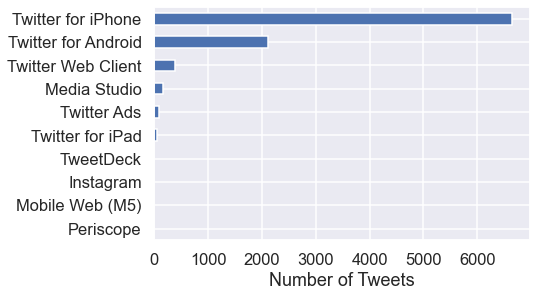

In [21]:
ax = df_trump['source'].value_counts(ascending=True).plot(kind='barh')
ax.set_xlabel("Number of Tweets")
plt.show()

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [22]:
print(df_trump['time'][0:3])

id
682723973449289728   2016-01-01 00:44:14+00:00
682764544402440192   2016-01-01 03:25:27+00:00
682792967736848385   2016-01-01 05:18:23+00:00
Name: time, dtype: datetime64[ns, UTC]


We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [23]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,2015-12-31 19:44:14-05:00
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,2015-12-31 22:25:27-05:00
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,2016-01-01 00:18:23-05:00
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,2016-01-01 01:07:28-05:00
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,2016-01-01 01:08:06-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [24]:
splitTime = [re.findall('(\d+)-(\d+)-(\d+) (\d+):(\d+):(\d+)-(\d+):(\d+)',str(time)) for time in df_trump['est_time']]
df_trump['hour'] = [(float(line[0][3]) + (float(line[0][4])/60) + (float(line[0][5])/(60**2))) for line in splitTime] # Write your code here
df_trump['roundhour']=round(df_trump['hour'])

In [25]:
assert np.isclose(df_trump.loc[690171032150237184]['hour'], 8.93639)


Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

In [26]:
df_trump.head()

,time,source,text,retweet_count,est_time,hour,roundhour
id,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,2015-12-31 19:44:14-05:00,19.737222,20.0
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,2015-12-31 22:25:27-05:00,22.424167,22.0
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,2016-01-01 00:18:23-05:00,0.306389,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,2016-01-01 01:07:28-05:00,1.124444,1.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,2016-01-01 01:08:06-05:00,1.135000,1.0


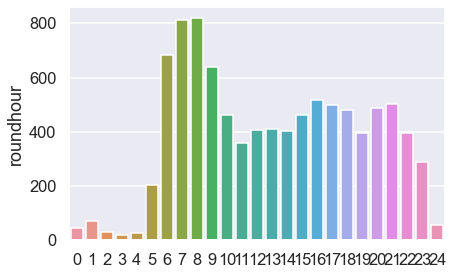

In [27]:
plot = sns.barplot(x = df_trump.roundhour.apply(int).value_counts().index, y = df_trump.roundhour.apply(int).value_counts())

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 
![title](images/device_hour2.png)


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


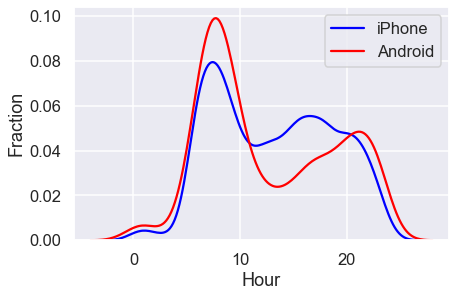

In [28]:
plot1 = plt.subplots(1,1)

sns.distplot(df_trump[df_trump['source']=='Twitter for iPhone' ]['roundhour'], color="blue",hist=False, label="iPhone")
sns.distplot(df_trump[df_trump['source']=='Twitter for Android']['roundhour'], color="red",hist=False, label="Android", kde=True)

plt.ylabel("Fraction")
plt.xlabel("Hour") 

plt.legend()
plt.show()

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


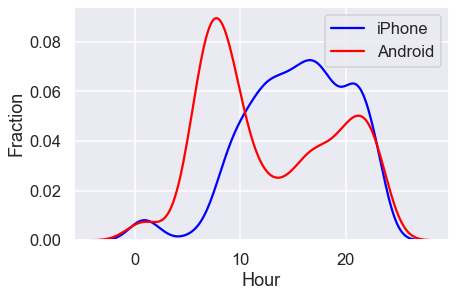

In [56]:
plot1 = plt.subplots(1,1)

def yr(st):
    return str(st).split('-')[0]

sns.distplot(df_trump[(df_trump['source']=='Twitter for iPhone') & (df_trump['est_time'].apply(yr) == '2016')]['roundhour'], color="blue", hist=False, label="iPhone")
sns.distplot(df_trump[(df_trump['source']=='Twitter for Android') & (df_trump['est_time'].apply(yr) == '2016')]['roundhour'], color="red", hist=False, label="Android", kde=True)

plt.xlabel("Hour")
plt.ylabel("Fraction")

plt.legend()
plt.show()

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [30]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

![source_years.png](attachment:source_years.png)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x1080 with 0 Axes>

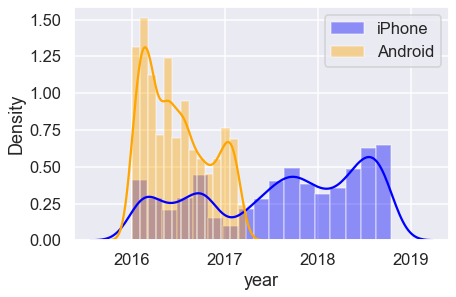

In [31]:
plt.figure(figsize=(15,15))
plot1 = plt.subplots(1,1)
sns.distplot(df_trump[(df_trump['source']=='Twitter for iPhone')]['year'],color="blue",label="iPhone")
sns.distplot(df_trump[(df_trump['source']=='Twitter for Android')]['year'],color="orange",label="Android")
plt.legend()
plt.show()

## PART 4 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [32]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [57]:
with open('data/vader_lexicon.txt', 'r') as f:
    file = f.readlines()

x = [line.split('\t') for line in file]
df_sent = pd.DataFrame(x).rename(columns={0: 'token', 1: 'polarity'}).set_index('token')[['polarity']]
df_sent['polarity'] = pd.to_numeric(df_sent['polarity'])
print(df_sent.head())

       polarity
token          
$:         -1.5
%)         -0.4
%-)        -1.5
&-:        -0.4
&:         -0.7


### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [58]:
df_trump['text'] = df_trump['text'].str.lower()

### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [35]:
punct_re = r'[^\w\s\\n]'
df_trump['no_punc'] = df_trump['text'].str.replace(punct_re,' ',regex=True)

In [36]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [37]:
tidy_format = pd.DataFrame(df_trump['no_punc'].str.replace('\s+',' ').str.split(' ',expand=True).stack()).reset_index(level=1).rename(columns={"level_1":"num", 0:"word"})
tidy_format.head()

<ipython-input-37-02b6da862acc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tidy_format = pd.DataFrame(df_trump['no_punc'].str.replace('\s+',' ').str.split(' ',expand=True).stack()).reset_index(level=1).rename(columns={"level_1":"num", 0:"word"})


,num,word
id,,
682723973449289728,0,i
682723973449289728,1,will
682723973449289728,2,be
682723973449289728,3,on
682723973449289728,4,foxnews


In [38]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [39]:
df_trump['polarity'] = ...
x = df_sent.merge(tidy_format, right_on='word', left_index=True, how='inner')
y = x.groupby(by='id')

df_trump['polarity'] = y.sum()
df_trump.fillna(0, inplace=True)

df_trump.head()

,time,source,text,retweet_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.0,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,2015-12-31 22:25:27-05:00,22.424167,22.0,2016.0,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,2016-01-01 00:18:23-05:00,0.306389,0.0,2016.0,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.0,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,2016-01-01 01:08:06-05:00,1.135000,1.0,2016.0,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9


In [40]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)

### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [41]:
print('Most negative tweets:')
for i in df_trump.sort_values(by=['polarity']).head()['text']:
    print("\n", i)

Most negative tweets:

 it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

 the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

 james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak and.....

 this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid for by c

In [59]:
print('Most positive tweets:')
for i in df_trump.sort_values(by=['polarity'], ascending=False).head()['text']:
    print("\n", i)

Most positive tweets:

 congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

 my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

 thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!

 it was my great honor to deliver a message at the marine corps air station miramar to our great u.s. military, straight from the heart of the american people: we support you, we thank you, we lov

### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


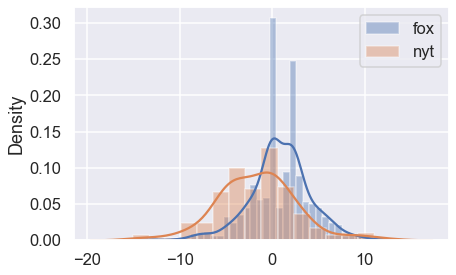

In [63]:
### BEGIN SOLUTION
plot1 = plt.subplots(1,1)
sns.distplot(df_trump[df_trump['no_punc'].str.contains('fox')][['polarity']],label='fox')
sns.distplot(df_trump[df_trump['no_punc'].str.contains('nyt')][['polarity']],label='nyt')
plt.legend()
plt.show()
### END SOLUTION

## PART 5 - Principal Component Analysis (PCA) and Twitter


### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created


In [60]:
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

d = df_trump.copy(deep=True).drop(columns=['time','source','retweet_count','polarity'])

words = nltk.corpus.stopwords.words('english') + ['rt'] + ['pm'] + ['am'] + ['hillary'] + ['clinton'] + ['hillaryclinton'] + ['berniesanders'] + ['jebbush'] + ['https'] + ['http'] + ['co'] + ['trump2016'] + ['realdonaldtrump'] + ['trump']

re = r'\b(?:{})\b'.format('|'.join(words))
d['no_punc'] = d['no_punc'].str.replace(re, '', regex=True)

count_vectorizer = CountVectorizer(max_features=50)
sparse_matrix = count_vectorizer.fit_transform(d.no_punc)
doc_term_matrix = sparse_matrix.todense()

df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
df.head(10)

[nltk_data] Downloading package punkt to /Users/tapan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tapan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,america,american,amp,back,bad,big,campaign,country,crooked,day,...,thank,time,today,trade,us,vote,want,win,would,years
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [61]:
from sklearn.decomposition import PCA
pca = PCA(50)
pca.fit(df)
components = pca.components_

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

![title](images/pca.png)



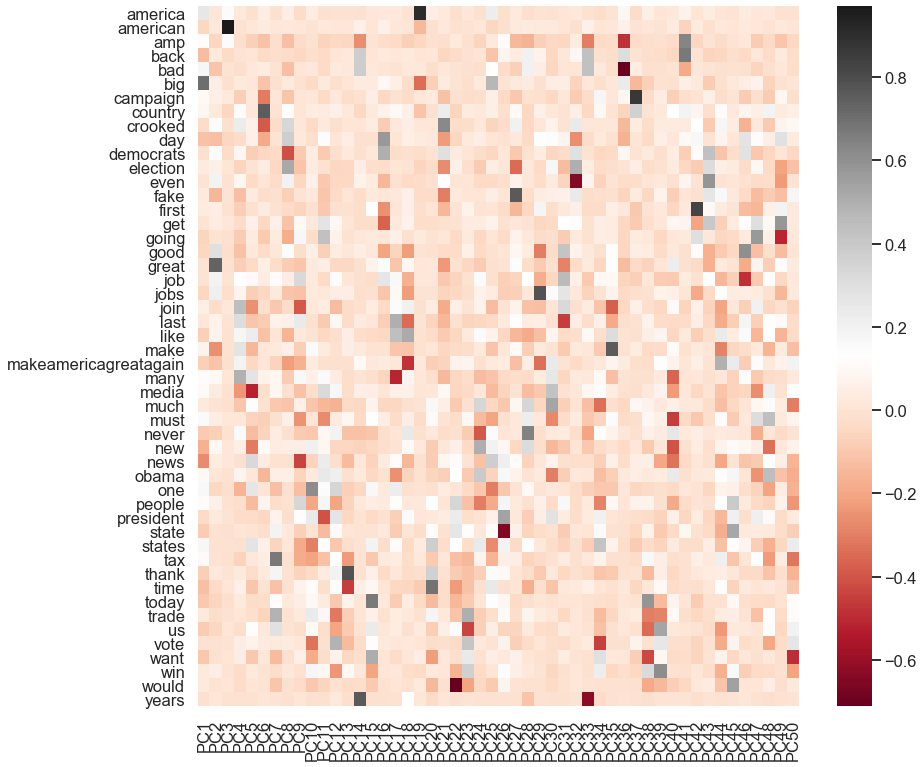

In [46]:
x = df.columns
y = np.array([])
for i in range(50):
    y = np.append(('PC' + str(50-i)), y)
    
fig = plt.subplots(figsize=(12,12))
sns.heatmap(components, cmap="RdGy", yticklabels = x, xticklabels = y)
plt.show()

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


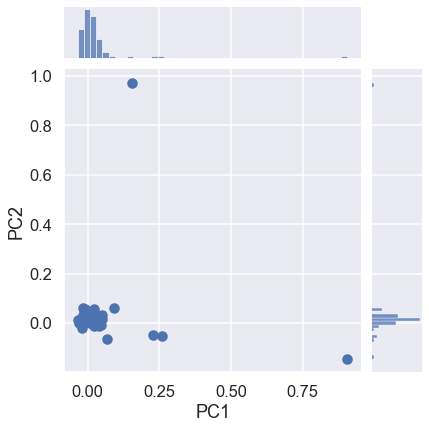

In [47]:
x1 = sns.JointGrid(components[0], components[1])
x1 = x1.plot_joint(plt.scatter)
x1 = x1.plot_marginals(sns.histplot, kde=False)
x1.set_axis_labels("PC1","PC2")
plt.show()

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~5-7 pandas commands and get everything done on one line.

In [48]:
top_20 = ...
retweet = (tidy_format.merge(df_trump, how='inner',left_index=True,right_index=True))
total = retweet[['word','retweet_count']].groupby('word').count()
wordsAppear = total[total['retweet_count'] >= 25]

final = retweet.merge(wordsAppear, how='inner', left_on='word', right_index=True)[['word','retweet_count_x']].groupby(['word']).sum()
average = final.merge(wordsAppear,how='inner',left_index=True, right_index=True)

average['avg'] = average['retweet_count_x']/average['retweet_count']
top = average.sort_values('avg', ascending=False).iloc[0:20].drop(columns=['retweet_count_x', 'retweet_count']).rename(columns={"avg":"retweet_count"})
top

,retweet_count
word,
jong,40408.666667
un,32569.365854
kim,32148.081633
maybe,30622.000000
try,29109.862069
nuclear,28703.000000
kavanaugh,28651.962963
old,28340.848485
mccabe,27836.870968


### Task 6.2
Plot a bar chart of your results:

<AxesSubplot:ylabel='word'>

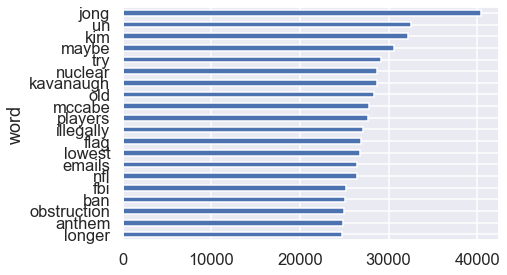

In [49]:
top.sort_values(by='retweet_count', ascending=True).plot.barh(legend=False)

<AxesSubplot:xlabel='polarity', ylabel='source'>

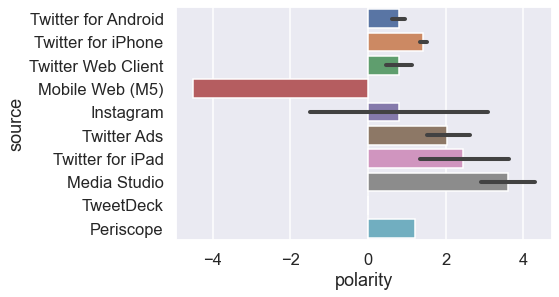

In [51]:
sns.barplot(x=df_trump.polarity, y = df_trump.source)